**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 1: Data Preparation*

# Identification

Name: Arthur Wang <br/>
Student Number: 300185298

# Exploratory Analysis

## Import important libraries

In [190]:
# Your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder

## Read Dataset

As outlined in the project description, it should be possible for the correctors to ecute your notebook without requiring any downloads.

To facilitate access to the dataset without the need for downloads, use the data ovided in the public GitHub repository and provide a link to the raw version of the taset.

The link to the raw version is as follows:

*https://raw.githubusercontent.com/GITHUB_USERNAME/REPOSITORY_NAME/main/DATASETNAME.v*

For example:

[https://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv]ttps://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv)

Now provide the link to YOUR dataset and read the dataset:

In [191]:
# reading glass identification dataset
glass_id_url = "https://raw.githubusercontent.com/Obskurity/CSI4106_A1/main/01/glass.csv"
glass_id_dataset = pd.read_csv(glass_id_url)

# reading dermatology dataset
dermatology_url = "https://raw.githubusercontent.com/Obskurity/CSI4106_A1/main/02/dermatology_database_1.csv"
dermatology_dataset = pd.read_csv(dermatology_url)

# reading maternal health risk dataset
mhr_url = "https://raw.githubusercontent.com/Obskurity/CSI4106_A1/main/03/Maternal%20Health%20Risk%20Data%20Set.csv"
mhr_dataset = pd.read_csv(mhr_url)

# reading car dataset
car_url = "https://raw.githubusercontent.com/Obskurity/CSI4106_A1/main/04/car.data"
car_dataset = pd.read_csv(car_url)

# reading wine quality dataset
wq_url = "https://raw.githubusercontent.com/Obskurity/CSI4106_A1/main/05/WineQT.csv"
wq_dataset = pd.read_csv(wq_url)

# reading 16 personalities dataset
sixteen_p_url = "https://raw.githubusercontent.com/Obskurity/CSI4106_A1/main/06/16P.csv"
sixteen_p_dataset = pd.read_csv(sixteen_p_url, encoding='ISO-8859-1')

# reading credit score dataset
# using training set only since it has sufficient data (100001 rows)
cs_url = "https://raw.githubusercontent.com/Obskurity/CSI4106_A1/main/07/train.csv"
cs_dataset = pd.read_csv(cs_url)

C:\Users\Arthur\AppData\Local\Temp\ipykernel_25708\407424671.py:28: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  cs_dataset = pd.read_csv(cs_url)


## Guidelines

The following are the questions for Assignment 1. Under each question, we have provided an initial code cell. You are encouraged to add additional code cells to maintain logical separation of your code. For instance, place the definition of a function in one cell and its execution in a subsequent cell. This approach will help preserve clarity and enhance readability by avoiding the inclusion of excessive code within a single cell.

1. **Analysis of Missing Values**: Examine the datasets to identify and assess ssing values in various attributes. Missing values may be represented by symbols ch as '?', empty strings, or other placeholders.

    1.1 In the list of options, what are the datasets that contain missing values? ecifically, which attribute or attributes has missing values?

    1.2 Describe the methodology used for this investigation, and provide the rresponding code.

    1.1 Data imputation involves replacing missing or incomplete data with substituted values to preserve the dataset's integrity for subsequent analysis. Propose imputation strategies for each attribute with missing values.

**1.1**

The datasets that contain missing values are the dermatology dataset, and the credit score dataset.

In the dermatology dataset, missing values are denoted by a '?,' and attribute with missing values is 'age.'

In the credit score dataset, missing values are denoted by either a null, '\_,' or '_______' value. The
attributes with missing values in the credit score dataset are: 'Name', 'Occupation', 'Monthly_Inhand_Salary', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance.' 

**1.2** 

The methodology used for this investigation is as follows: 

Prior to reading the information on each dataset, I performed null value checks for all features in the dataset.

Based on the original datasets sources and their descriptions, the glass identification dataset has no missing values, the dermatology’s dataset’s missing values are denoted by a ‘?,’ the maternal health risk dataset has no missing values, and the car dataset has no missing values, and the 'Name' attribute in the credit score training dataset contained null values. The rest of the datasets and their respective attributes had no indication on their original dataset’s source. This information helped me verify that some of my null value checks were indeed correct.

Finally, I went through each dataset individually to check if missing values were denoted with a special character(given that it was not mentioned in the datasets’ source’s description). For instance, occupation in credit_score was denoted ‘_______.’ And for other attributes in the credit score dataset, missing values were set with ‘_.’ I assumed these special characters were missing values because the attributes were categorical values.

To check for empty missing values using pandas, we first count the sum of null/'?'/'_'/'_____' values in each column, then we sum those missing values per column to get the total missing values. If the resulting sum is greater than 0 then missing values exist.  To figure out which columns have the missing values we index and look for which columns are empty.

In [192]:
# Your code goes here
# 1.2a - Finding out which datasets have missing values

# missing attribute values: None (dataset origin says so)
# performed the following check prior to knowing this
glass_missing = glass_id_dataset.isnull().sum().sum()
print("Missing null values in the glass identification dataset:", glass_missing)

# performed the following check prior to knowing this
dermatology_missing_null = dermatology_dataset.isnull().sum().sum()
print("\nMissing null values in the dermatology dataset:", dermatology_missing_null)
# missing values represented with '?' (dataset origin says so)
dermatology_missing = (dermatology_dataset == '?').sum().sum()
print("Missing ? values in the dermatology dataset:", dermatology_missing)

# has no missing values (dataset origin says so)
# performed the following check prior to knowing this
mhr_missing = mhr_dataset.isnull().sum().sum()
print("\nMissing null values in the maternal health risk dataset:", mhr_missing)

# has no missing values (dataset origin says so)
# performed the following check prior to knowing this
car_missing = car_dataset.isnull().sum().sum()
print("\nMissing null values in the car dataset:", car_missing)

# wine quality dataset
# performed the following check prior to knowing this
wq_missing = wq_dataset.isnull().sum().sum()
print("\nMissing null values in the wine quality dataset:", wq_missing)

# 16 personalities dataset
sixteen_p_missing = sixteen_p_dataset.isnull().sum().sum()
print("\nMissing null values in the 16 personalities dataset:", sixteen_p_missing)

# credit score dataset | based on observation, I have found in this that missing values are represented as '______', '_', or null.
cs_missing = cs_dataset.isnull().sum().sum()
print("\nMissing null values in the credit score dataset:", cs_missing)
l_underscore_count = (cs_dataset == '_______').sum().sum()
print("Missing _______ values in the credit score dataset:", l_underscore_count)
cs_missing  += l_underscore_count
underscore_count = (cs_dataset == '_').sum().sum()
print("Missing _ values in the credit score dataset:", underscore_count)
cs_missing  += underscore_count
print("Total missing values in the credit score dataset:", cs_missing)

Missing null values in the glass identification dataset: 0

Missing null values in the dermatology dataset: 0
Missing ? values in the dermatology dataset: 8

Missing null values in the maternal health risk dataset: 0

Missing null values in the car dataset: 0

Missing null values in the wine quality dataset: 0

Missing null values in the 16 personalities dataset: 0

Missing null values in the credit score dataset: 60071
Missing _______ values in the credit score dataset: 7062
Missing _ values in the credit score dataset: 22286
Total missing values in the credit score dataset: 89419


In [193]:
# 1.2b - finding out which attributes have missing value in datastees that have missing values
# As we can observe from the previous results, the dermatology and credit score have missing values
# we know that the credit score dataset only has missing values that are '?'
missing_attributes_dermatology = dermatology_dataset.columns[(dermatology_dataset == '?').any()]
print("Attribute(s) with missing values for dermatology dataset: ", missing_attributes_dermatology)

# based on observation, I have found in this that missing values are represented as '______', '_', or null.
missing_attributes_cs = cs_dataset.columns[cs_dataset.isnull().any()]
print("\nAttribute(s) with missing values using null for credit score dataset: ", missing_attributes_cs)
lu_missing_attributes_cs = cs_dataset.columns[(cs_dataset == '_______').any()]
print("\nAttribute(s) with missing values using _______ for credit score dataset: ", lu_missing_attributes_cs)
u_missing_attributes_cs = cs_dataset.columns[(cs_dataset == '_').any()]
print("\nAttribute(s) with missing values using _ for credit score dataset: ", u_missing_attributes_cs)

Attribute(s) with missing values for dermatology dataset:  Index(['age'], dtype='object')

Attribute(s) with missing values using null for credit score dataset:  Index(['Name', 'Monthly_Inhand_Salary', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_History_Age',
       'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

Attribute(s) with missing values using _______ for credit score dataset:  Index(['Occupation'], dtype='object')

Attribute(s) with missing values using _ for credit score dataset:  Index(['Changed_Credit_Limit', 'Credit_Mix'], dtype='object')


**1.3 Data Imputation Strategies**

<u>Dermatology Dataset</u>

For the ‘age’ attribute in the dermatology dataset, there are a variety of data imputation strategies we can use:
The best data imputation strategy would be to K-Nearest-Neighbours regression. I propose using K-NN regression since I believe age is correlated with the other attributes given. Moreover, with K-NN, since age is the only missing attribute is age, we can use other attributes in our K-NN calculation. We use K-NN regression because age is a continous value. Finally, since the dataset is not huge(367 rows), thus computation will not be expensive.

(reference slides with regression K-NN)
(https://www.ibm.com/topics/knn)

<u>Credit Score Dataset</u>

For the credit score dataset, a lot of the attributes have missing values:  'Name', 'Occupation', 'Monthly_Inhand_Salary', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance.'

For the ‘Name’ attribute, the data imputation strategy we should use would be leaving the name as null, or setting it to a special value like ‘Unknown,’ or 'Not Specified.' This is because names are normally unique and should not be correlated with anything, thus we should not be trying to predicts its values if they are missing.

For the categorical attributes like: ‘Occupation,’ ‘Type of Loan,’ and ‘Credit Mix’ attributes, I believe we can leverage K-NN but with classification instead of regression, since their possible values are discrete in nature. As a result, we can use other features in the dataset to help fill in these missing values. Another strategy we can use here is use some type of predictive modeling like a decision tree or random forest, however these require more work to set up. (https://towardsdatascience.com/decision-trees-and-random-forests-df0c3123f991)

For numerical attributes like ‘Monthly_Inhand_Salary,’ ‘Monthly_Balance,’ and ‘Amount_invested_monthly,’ we can assume these values are highly correlated with each other, and correlated with the ‘age,’ and ‘occupation’ attributes, most probably in a linear relationship. Thus, we can use linear regression as our data imputation strategy to fill in these missing values, since they are continuous and have a linear relationship with other attributes(that were listed). (slides)

For the remainder of the numerical attributes 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries','Credit_History_Age,' the data is continous and won't always have a linear relationship with other features, thus K-NN regression will work best for these.

2. **Select and familiarize yourself with a classification task:** Choose one of e provided datasets for further investigation. It is advisable to select a dataset ntaining a sufficiently large number of examples, ideally around 1,000, to ensure bust results when applying machine learning algorithms in the subsequent assignment.

    2.1 What is the objective of the task? Is it intended for a specific plication? Do you possess expertise in this particular domain of application?

**2.** 
I am choosing the wine quality dataset. There are 1144 features in this dataset so it should be sufficient.

**2.1** 
The objective of this task is to anticipate/predict the quality of wine given chemical attributes/characteristics that help determine if a wine is good quality or not. The application of this dataset is the quality of wine. I do not have expertise in the understanding the quality of wine based on the given chemical attributes, and thus the reasoning behind using the dataset is because it has sufficient data, has no missing values, and will help me to better understand the relationship between chemical characteristics of the wine and how it influences the wine
quality.



3. **Attribute Analysis**: 

    3.1 Determine which attributes lack informativeness and should be excluded to prove the effectiveness of the machine learning analysis. If all features are emed relevant, explicitly state this conclusion.

    3.2 Examine the distribution of each attribute (column) within the dataset. Utilize histograms or boxplots to visualize the distributions, identifying any underlying patterns or outliers.

**3.1**

The attributes that lack informativeness are only the ID attribute, since that is just to uniquely identify each wine, however will not be useful for machine learning analysis. The remainder of the attributes are relevant to determining the quality of wine.

In [194]:
wq_dataset = wq_dataset.drop(columns=['Id'])

**3.2** 

Code Below. 
In the code, I am using a histogram to to visualize the distributions and identify patterns.
To calculate bin numbers of the histogram, I used the Freedman-Diaconis rule(https://stats.stackexchange.com/questions/798/calculating-optimal-number-of-bins-in-a-histogram).

In [195]:
# calculating bin numbers for histogram using the Freedman-Diaconis rule
def num_bins(column_name):
    c = wq_dataset[column_name]
    Q1 = np.percentile(c, 25)  
    Q3 = np.percentile(c, 75)  
    IQR = Q3 - Q1
    bin_width = (2 * IQR) / (len(c) ** (1/3))
    num_bins = int((c.max() - c.min()) / bin_width)
    return num_bins

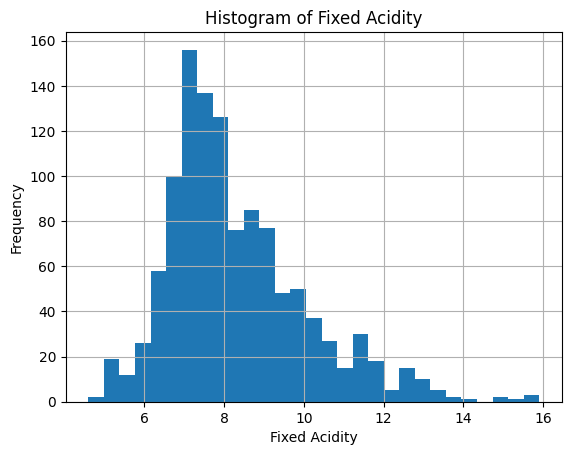

In [196]:
n = num_bins('fixed acidity')

# Fixed Acidity Attribute
wq_dataset['fixed acidity'].hist(bins=n)
plt.title('Histogram of Fixed Acidity')
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency')
plt.show()

As we can observe for the 'Fixed Acidity' attribute, the data from this attribute is right/positively skewed, and is not symmetric. There exists outliers > 14.

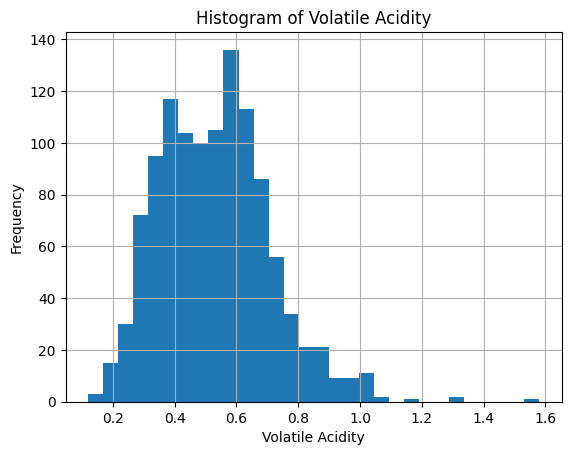

In [197]:
n = num_bins('volatile acidity')

# Volatile Acidity Attribute
wq_dataset['volatile acidity'].hist(bins=n)
plt.title('Histogram of Volatile Acidity')
plt.xlabel('Volatile Acidity')
plt.ylabel('Frequency')
plt.show()

As we can observe for the 'Volatile Acidity' attribute, the data from this attribute is slightly right/positively skewed, and is not symmetric. There exists outliers > 1.1 value, on the right of the histogram.

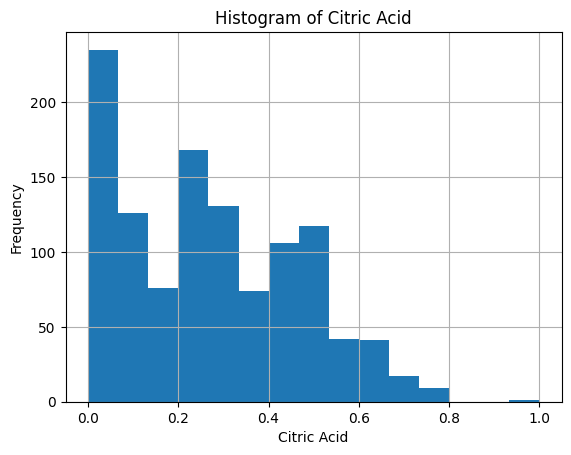

In [198]:
n = num_bins('citric acid')

# Citric Acid Attribute
wq_dataset['citric acid'].hist(bins=n)
plt.title('Histogram of Citric Acid')
plt.xlabel('Citric Acid')
plt.ylabel('Frequency')
plt.show()

As we can observe for the 'Citric Acid' attribute, the data from this attribute is right/positively skewed, and is not symmetric. There exists outliers, which values > 0.9.

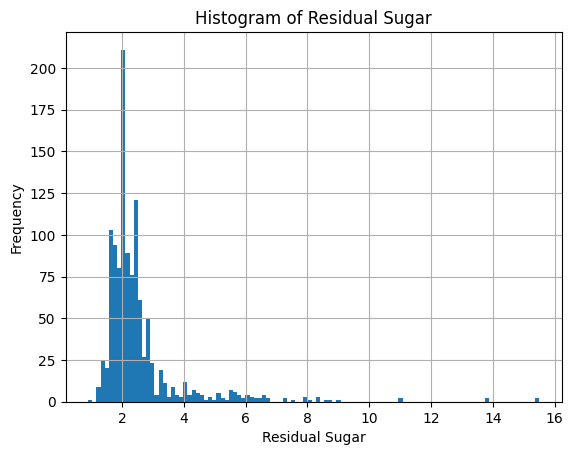

In [199]:
n = num_bins('residual sugar')

# Residual Sugar Attribute
wq_dataset['residual sugar'].hist(bins=n)
plt.title('Histogram of Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Frequency')
plt.show()

As we can observe for the 'Residual Sugar' attribute, the data from this attribute is right/positively skewed, and is not symmetric. There exists outliers > value 11.

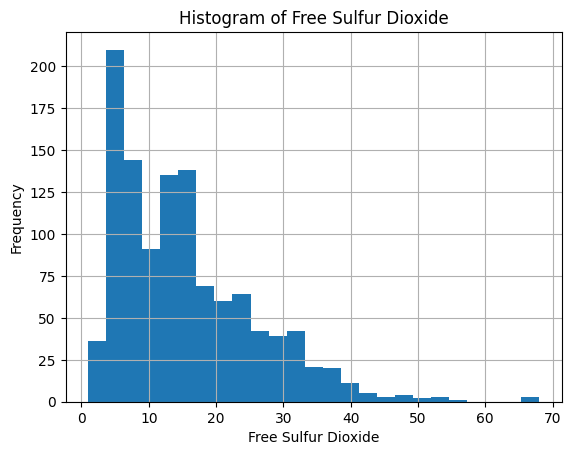

In [200]:
n = num_bins('free sulfur dioxide')

# Free Sulfur Dioxide Attribute
wq_dataset['free sulfur dioxide'].hist(bins=n)
plt.title('Histogram of Free Sulfur Dioxide')
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Frequency')
plt.show()

As we can observe for the 'Free Sulfur Dioxide' attribute, the data from this attribute is right/positively skewed, and is not symmetric. There exists outliers for values > 65.

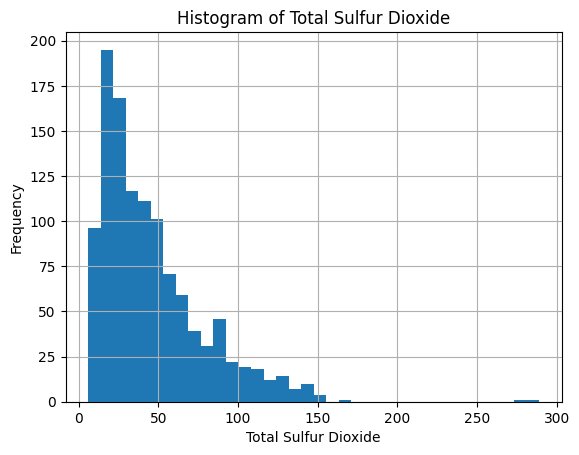

In [201]:
n = num_bins('total sulfur dioxide')

# Total Sulfur Dioxide Attribute
wq_dataset['total sulfur dioxide'].hist(bins=n)
plt.title('Histogram of Total Sulfur Dioxide')
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Frequency')
plt.show()

As we can observe for the 'Total Sulfur Dioxide' attribute, the data from this attribute is right/positively skewed, and is not symmetric. There exists an outlier value > 260.

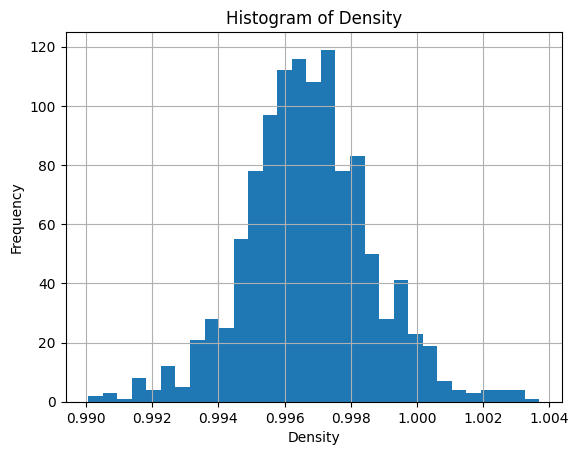

In [202]:
n = num_bins('density')

# Density Attribute
wq_dataset['density'].hist(bins=n)
plt.title('Histogram of Density')
plt.xlabel('Density')
plt.ylabel('Frequency')
plt.show('Frequency')

As we can observe for the 'Density' attribute, the density attribute's data has close to a normal distirbution and is roughly symmetric. There are no outliers.

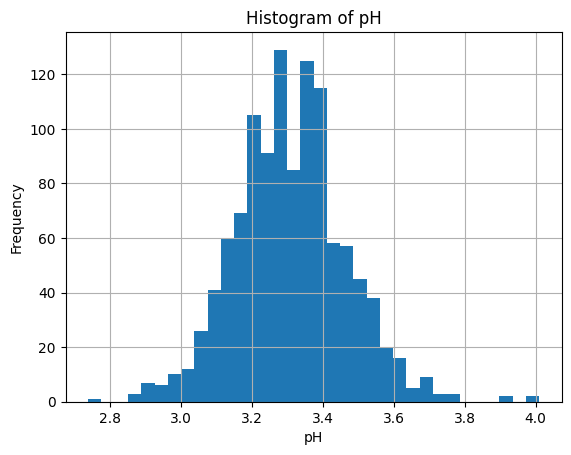

In [203]:
n = num_bins('pH')

# pH Attribute
wq_dataset['pH'].hist(bins=n)
plt.title('Histogram of pH')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.show()

As we can observe for the 'pH' attribute, the pH attribute's data is close to a normal distribution, and is roughly symmetric. There exists outiers values < 2.8, and 2 outliers values > 3.9.

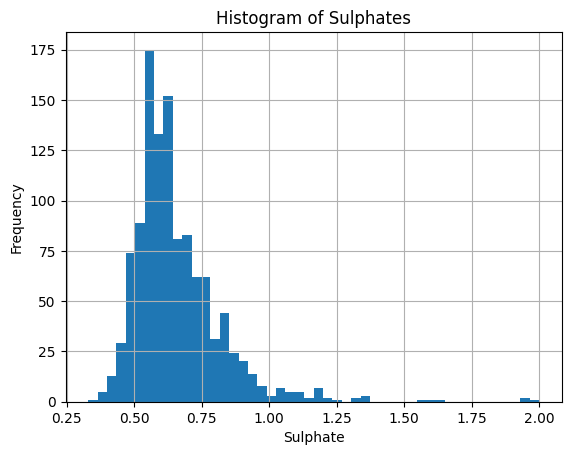

In [204]:
n = num_bins('sulphates')

# Sulphates Attribute
wq_dataset['sulphates'].hist(bins=n)
plt.title('Histogram of Sulphates')
plt.xlabel('Sulphate')
plt.ylabel('Frequency')
plt.show()

As we can observe for the 'Sulphates' attribute, the data from this attribute is right/positively skewed, and is not symmetric. There exists outliers on values > 1.26.

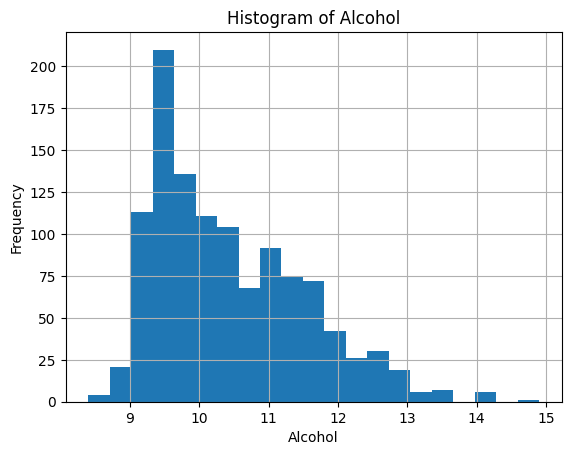

In [205]:
n = num_bins('alcohol')

# Alcohol Attribute
wq_dataset['alcohol'].hist(bins=n)
plt.title('Histogram of Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.show()

As we can observe for the 'Alcohol' attribute, the data from this attribute is right/positively skewed, and is not symmetric. There exists outliers with values >= 14.

**3.2 General Distribution and Outlier Analysis**

After looking at all the attributes and their distributions, the majority of graphs are right/positively skewed. The majority of these right/positively skewed graphs have outliers that exist onthe right side of the graph.

There are 2 graphs with close to a normal distribution, one with no outliers, and the other has outliers on both the left and right side of extreme/outlier values.

4. **Class Distribution Analysis**: Investigate the distribution of class labels within the dataset. Employ bar plots to visualize the frequency of instances for each class, and assess whether the dataset is balanced or imbalanced.

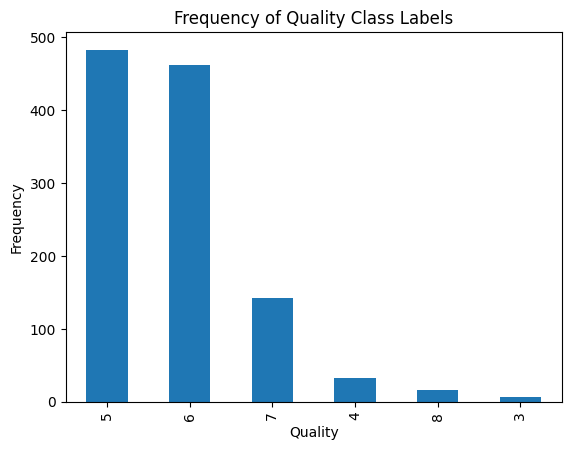

In [206]:
# Your code goes here
sorted = wq_dataset['quality'].value_counts()
sorted.plot(kind='bar')
plt.title('Frequency of Quality Class Labels')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()
# used code from: https://www.w3schools.com/python/matplotlib_plotting.asp

The class labels for this dataset is the quality, and as we can observe, the datset is imbalanced, as most of the values of the quality class label are 5 or 6.

5. **Preprocessing**: 

    5.1 For numerical features, determine the best transformation to use. Indicate e transformation that seems appropriate and why. Include the code illustrating how  apply the transformation. For at least one attribute, show the distribution before d after the transformation. See [Preprocessing data](https://scikit-learn.org/able/modules/preprocessing.html).

    5.2 For categorical features, show how to apply [one-hot encoding](https://ikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).  your dataset does not have categorical data, show how to apply the one-hot encoder  the label (target variable).

**5.1**

All features in the dataset 

In [207]:
# 5.2 - Applying one-hot encoder to the label/target variable (quality).
# My dataset does not have categorical data, so I will show how to apply the one-hot encoder to the quality attribute (target variable)

In [208]:
# Your code goes here

6. **Training and target data**: Set the Python variable `X` to designate the data and `y` to designate the target class. Make sure to select only the informative features.

In [209]:
# Your code goes here

7. **Training and test sets**: Split the dataset into training and testing sets. Reserve 20% of data for testing.

In [210]:
# Your code goes here

--------------------------------------------------------------------------

# References

Make sure you provide references to ALL sources used (articles, code, algorithms).

## AI transcript
**Hint:** To share a link to your colab notebook, click on "share" on the top right. Then, under *General access* , change *Restricted* to "Anyone with the link".